By Luke Leckie. Code for publication entitled "The content and structure of dreams are coupled to affect "
This script allows users to explore our dream networks.

In [232]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import cython
import pickle
from gensim.models import Word2Vec, KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.preprocessing import normalize
import numpy as np
import networkx as nx
from scipy.stats import linregress
from scipy import stats
from collections import defaultdict
%matplotlib inline
from matplotlib.gridspec import GridSpec
import random

import semantic_network_functions as sn


Load in our embedding, dictionary and data, all available on github repo. We recommend loading dreams ranked in the top or bottom 100 for each affective dimension.

In [233]:
direc_data='/home/ll16598/Documents/altered_states/2024/final_network_results/'
model_dir='/home/ll16598/Documents/altered_states/2024/models/'
direc_dict='/home/ll16598/Documents/altered_states/2024/dictionaries/'
w2vmodel=  Word2Vec.load(model_dir+"dream_model_100_10_5") 
infile = open(direc_dict+'130comp5nonzeros_dictionary','rb')
dictionary=pickle.load(infile)
infile.close()
corpus = pd.read_csv(direc_data+"DreamBank_results_130_DI_cosine.csv") 

Here we create valence and arousal dimensions in our embedding.

In [234]:
lo_list=['lazy', 'bored', 'tired','peaceful','relaxed','calm']#Low arousal
hi_list=['energetic', 'delighted', 'excited','tense', 'angry', 'frustrated']#High arousal
pos_list=['good', 'happy', 'relaxed','confident','safe','love']#Positive valence
neg_list=['bad', 'sad', 'angry','anxious','scared','disgust']#Negative valence
positive_vec=sn.creat_vec(pos_list, w2vmodel)
negative_vec=sn.creat_vec(neg_list, w2vmodel)
high_arousal_vec=sn.creat_vec(hi_list, w2vmodel)
low_arousal_vec=sn.creat_vec(lo_list, w2vmodel)
pos_neg_vec = normalize(positive_vec.reshape(1, -1)) - normalize(negative_vec.reshape(1, -1))
hi_low_vec = normalize(high_arousal_vec.reshape(1, -1)) - normalize(low_arousal_vec.reshape(1, -1))


Here we load our topics onto our dimensions. You can also print the valence/arousal of each topic alongide it's moser representative words by setting either "print_valence" or "print_arousal" to True.

In [235]:
print_valence=True
print_arousal=False
cossim_pos_neg = {}
for i in range(0, len(dictionary)):
    cos_sim = cosine_similarity(pos_neg_vec.reshape(1, -1), dictionary[i].reshape(1, -1))[0]
    if print_valence:
        print("Discourse_Atom " + str(i)) #Print discourse atom and valence
        print([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary[i], topn=25)])
        print("Valence=", cos_sim)
    cossim_pos_neg[str(i)]=cos_sim
    
cossim_high_low = {}
for i in range(0, len(dictionary)):
    cos_sim = cosine_similarity(hi_low_vec.reshape(1, -1), dictionary[i].reshape(1, -1))[0]
    if print_arousal:
        print("Discourse_Atom " + str(i)) #Print discourse atom and arousal
        print([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary[i], topn=25)])
        print("Arousal=",cos_sim)
    cossim_high_low[str(i)]=cos_sim

Discourse_Atom 0
['said_oh', 'replied', 'implying', 'said', 'knows', 'says', 'says_oh', 'kept_saying', 'replies', 'saying', 'said_yeah', 'tells_me', 'thinks', 'said_yes', 'meaning', 'mentioned', 'knowing', 'assures_me', 'says_yes', 'admitted', 'answered', 'answers', 'indicating', 'means', 'explains']
Valence= [0.00924494]
Discourse_Atom 1
['week', 'month', 'few_days', 'hours', 'weekend', 'weeks', 'year', 'half_hour', 'afternoon', 'an_hour', 'hour', 'meal', 'exam', 'two_weeks', 'evening', 'long_time', 'months', 'exams', 'two_days', 'day', 'few_weeks', 'minutes', 'christmas', 'few_months', 'few_hours']
Valence= [0.09636436]
Discourse_Atom 2
['asked', 'wondered', 'ask', 'kept_asking', 'asking', 'wasnt_sure', 'dont_know', 'wonder', 'wonders', 'asks', 'would_happen', 'didnt_understand', 'didnt_know', 'couldnt_understand', 'explained', 'explaining', 'not_knowing', 'dont_understand', 'cant_understand', 'not_sure', 'cant_recall', 'cant_remember', 'no_matter', 'meant', 'knows']
Valence= [0.0769

Discourse_Atom 76
['bored', 'wealthy', 'thrilled', 'busy', 'horny', 'lazy', 'gay', 'poor', 'talented', 'successful', 'eager', 'bit_annoyed', 'retired', 'babysitting', 'noisy', 'strict', 'restless', 'honored', 'getting_married', 'rich', 'attending', 'mellow', 'taken_aback', 'unhappy', 'competent']
Valence= [0.13437788]
Discourse_Atom 77
['away', 'off', 'finally', 'until', 'after', 'away_from', 'eventually', 'immediately', 'before', 'over', 'closer', 'then', 'hit', 'forward', 'till', 'apart', 'accidentally', 'started', 'out', 'caught', 'quickly', 'thru', 'missed', 'when', 'horse']
Valence= [-0.26603568]
Discourse_Atom 78
['all_sorts', 'hundreds', 'all_kinds', 'lots', 'tons', 'whole_bunch', 'piles', 'stacks', 'full', 'different_types', 'handful', 'millions', 'dozens', 'sorts', 'bits', 'different_kinds', 'series', 'getting_rid', 'kinds', 'plenty', 'bunches', 'some_sort', 'photographs', 'photos', 'groups']
Valence= [0.1030119]
Discourse_Atom 79
['funny', 'stuff', 'weird', 'like', 'fun', 'st

['were', 'werent', 'various', 'both', 'different', 'arent', 'are', 'these', 'groups', 'mostly', 'their_own', 'discussed', 'they_werent', 'were_discussing', 'their', 'families', 'those', 'theyre', 'together', 'chairs', 'four', 'stores', 'lined_up', 'babies', 'teenagers']
Valence= [0.30424401]
Discourse_Atom 110
['an_old', 'large', 'small', 'an_empty', 'nearby', 'victorian', 'huge', 'tiny', 'dining', 'small_square', 'spacious', 'modern', 'dimly_lit', 'motel', 'long_narrow', 'big', 'overlooking', 'oak', 'an_attic', 'an_oldfashioned', 'who_lives', 'grocery', 'wooden', 'miniature', 'cluttered']
Valence= [0.07555205]
Discourse_Atom 111
['back', 'returned', 'left', 'home', 'past', 'gone', 'return', 'locked', 'leave', 'front_door', 'closed', 'parking_lot', 'next_morning', 'ed', 'parents', 'upstairs', 'moved', 'shower', 'parked', 'destination', 'dorm_room', 'entered', 'apartment', 'arrived', 'driveway']
Valence= [-0.11635058]
Discourse_Atom 112
['no', 'only', 'nothing', 'at_least', 'nobody', 'n

Now we can explore dreams over our corpus. This will show you the dream at index k, it's topic sequence and dream network. Set "print_similar_words" to true to print the most similar words to each topic vector. See our Appendix topic key for our labeling of each topic.

Dream:
 '1977-030', ' '8/25/77', ' "Traveling with friends and our cat; I can't decide what to buy from the many selections I see. I help their daughter to cook healthy foods."
Atom sequence:
50 34 20 34 34 34 34 34 24 123 104 104 119 119 119 5 5
Valence:
0.200428704488706
Arousal:
0.044768050661949
For median_Valence, this dream is in the top 99.57%/bottom 0.43%
For median_Arousal, this dream is in the top 58.33%/bottom 41.67%
For Mean coherence, this dream is in the top 8.35%/bottom 91.65%
For Std.coherence, this dream is in the top 63.32%/bottom 36.68%
For Topic path, this dream is in the top 69.62%/bottom 30.38%
For Cosine path, this dream is in the top 69.53%/bottom 30.47%
For Modularity, this dream is in the top 32.55%/bottom 67.45%
For Cosine Modularity, this dream is in the top 38.66%/bottom 61.34%
For Efficiency, this dream is in the top 84.89%/bottom 15.11%
For Feedback loops, this dream is in the top 26.34%/bottom 73.66%
For Clustering, this dream is in the top 0.00%/bottom 

/home/ll16598/miniconda3/envs/SICC_AUG_22/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


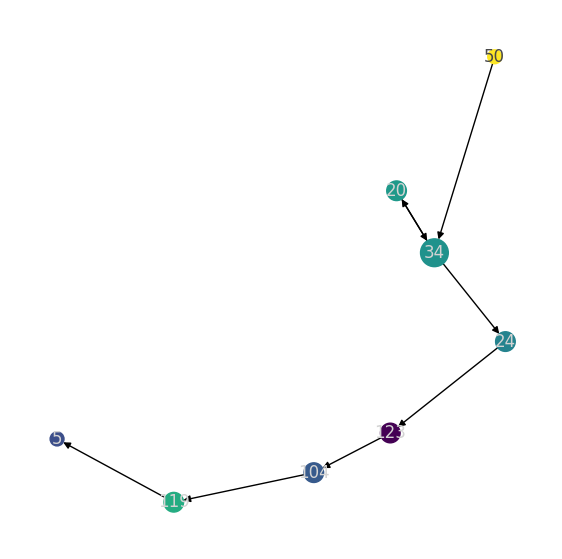

In [236]:
manual=False#set to true if you want to select a particular dream. False to get a dream in a percentile
n_percent = 1 #what percentile to extract a random dream from
top = True  # Set to False for bottom n% true for top n%
dream_index=85
metric = 'median_Valence'  # Can be 'median_Valence' or 'median_Arousal'
def get_percentile_indices(column, percentile, top=True):
    values = corpus[column].dropna().values
    threshold = np.percentile(values, 100 - percentile if top else percentile)
    if top:
        indices = np.where(corpus[column] >= threshold)[0]
    else:
        indices = np.where(corpus[column] <= threshold)[0]
    return indices

if manual:
    k = dream_index
else:
    dream_indices = get_percentile_indices(metric, n_percent, top)
    k = random.choice(dream_indices)

columns_to_print = [
    'median_Valence', 'median_Arousal', 'Mean coherence', 'Std.coherence',\
    'Topic path', 'Cosine path', 'Modularity', 'Cosine Modularity'\
    , 'Efficiency', 'Feedback loops','Clustering', 
    'DH', 'Transitivity', 'Gini', 'Nodes'
]
print_similar_words = False  # Make true if you want to see the most representative words for each topic
figwidth = 7
figheight = 7


# Create the structure graph for the dream at index k
G = sn.structureG(corpus['atom_seq'][k], dictionary)

print('Dream:')
print(corpus['dreams'][k])
print('Atom sequence:')
print(corpus['atom_seq'][k])

if print_similar_words:
    print('Most similar words to each topic:')
    sn.print_topics(corpus['atom_seq'].iloc[k].split(), topn=5)

print('Valence:')
print(corpus['median_Valence'][k])
print('Arousal:')
print(corpus['median_Arousal'][k])

# Calculate the percentile rank for each column
for column in columns_to_print:
    values = corpus[column].dropna().values
    value = corpus[column][k]
    percentile = np.sum(values < value) / len(values) * 100
    print(f'For {column}, this dream is in the top {percentile:.2f}%/bottom {100-percentile:.2f}%')

# Visualize the structure graph
cos_sim_values = [cossim_pos_neg[str(topic)] for topic in G.nodes()]
norm = plt.Normalize(vmin=min(cos_sim_values), vmax=max(cos_sim_values))
colors = plt.cm.viridis(norm(cos_sim_values))
cmap = plt.cm.viridis
np.random.seed(42)

# Calculate node sizes based on in-degree
in_degree = dict(G.degree())
sizes = [in_degree[node] * 100 for node in G.nodes()]

fig = plt.figure(figsize=(figwidth, figheight))
gs = gridspec.GridSpec(1, 1, width_ratios=[1])
ax0 = plt.subplot(gs[0])
pos = nx.spring_layout(G)
for (u, v, d) in G.edges(data=True):
    weight = d['direct_weight']
    # Adjust the positions by scaling them inversely with weight
    pos[u] = pos[u] * (1 / weight)
    pos[v] = pos[v] * (1 / weight)

node_colors = np.array([colors for i in G.nodes()])
threshold = 0.5  # Adjust this threshold based on what you consider "dark"

label_colors = {}
for node in G.nodes():
    color = colors[list(G.nodes()).index(node)]
    # Calculate perceived brightness (using luminance formula)
    brightness = 0.299 * color[0][0] + 0.587 * color[0][1] + 0.114 * color[0][2]
    if brightness < 0.5:
        label_colors[node] = 'lightgrey'
    else:
        label_colors[node] = '#484848'  # Dark grey

nx.draw(G, pos=pos, with_labels=False, node_color=colors, cmap=cmap, node_size=sizes)
for node, (x, y) in pos.items():
    nx.draw_networkx_labels(G, pos, labels={node: node}, font_color=label_colors[node])

